In [2]:
import numpy as np
import netCDF4

In [7]:
dataset = netCDF4.Dataset('../data/slp.4dx4dy.nh_ndjfm_19792019_subseas_cell.nc', 'r')

In [8]:
var = dataset.variables['var1'][:].data

In [9]:
var.shape

(6130, 16197)

In [10]:
var.T.shape

(16197, 6130)

# --------------------------Testing interpolation with matplotlib--------------------------

In [9]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [3]:
np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

In [6]:
print('\nx: ', x.shape, '\n', 'y: ', y.shape, '\n', 'z: ', z.shape)


x:  (200,) 
 y:  (200,) 
 z:  (200,)


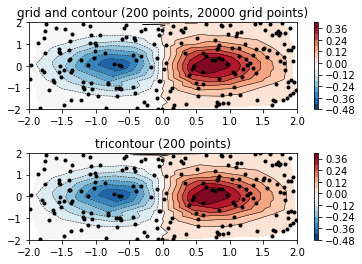

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

# --------------------------------------------------------------------------------------------------------

In [3]:
import numpy as np

In [4]:
file_path = '../data/'
file_grid_cells = 'grid_cell.txt'

In [6]:
lat_list = []
lon_list = []
counter = 0
with open(file_path+file_grid_cells, "r") as file:
    for line in file:
        # file_grid_cells specific tasks
        if counter > 2 and counter < 83:
            lon_list.append(np.array(line.split(' ')[:-1], dtype=np.float64))
        if counter > 84:
            lat_list.append(np.array(line.split(' ')[:-1], dtype=np.float64))
            
        counter+=1

lat = np.concatenate(lat_list, axis=0)
lon = np.concatenate(lon_list, axis=0)

lon_lat_list = []
for i in range(lat.shape[0]):
    lon_lat_list.append((lon[i], lat[i]))
lon_lat = np.array(lon_lat_list)

In [7]:
lon_lat.shape

(16197, 2)

In [10]:
np.unique(lat)

array([ 0.9836063,  2.107728 ,  3.231849 ,  3.34894  ,  4.355971 ,
        5.480092 ,  6.604213 ,  7.728335 ,  7.96252  ,  8.852456 ,
        9.976578 , 11.1007   , 12.22482  , 13.34894  , 14.47306  ,
       15.59718  , 16.72131  , 17.84543  , 18.96955  , 20.09367  ,
       21.21779  , 22.34191  , 23.46603  , 24.59016  , 25.71428  ,
       26.8384   , 27.96252  , 29.08664  , 30.21076  , 31.33488  ,
       32.45901  , 33.58313  , 34.70725  , 35.83137  , 36.95549  ,
       38.07961  , 39.20373  , 40.32785  , 41.45198  , 42.5761   ,
       43.70022  , 44.82434  , 45.94846  , 47.07258  , 48.1967   ,
       49.32082  , 50.44494  , 51.56906  , 52.69319  , 53.81731  ,
       54.94143  , 56.06555  , 57.18967  , 58.31379  , 59.43791  ,
       60.56203  , 61.68615  , 62.81027  , 63.93439  , 65.05851  ,
       66.18263  , 67.30675  , 68.43087  , 69.55499  , 70.67911  ,
       71.80323  , 72.92734  , 74.05146  , 75.17558  , 76.29969  ,
       77.42381  , 78.54792  , 79.67204  , 80.79615  , 81.9202

In [15]:
lon_per_lat = []

for unique_lat in np.unique(lat):
    tmp = []
    for coord in lon_lat:
        if coord[1] == unique_lat:
            tmp.append(coord[0])
    lon_per_lat.append(tmp)
lon_per_lat

[[-180.0,
  -178.8715,
  -177.7429,
  -176.6144,
  -175.4859,
  -174.3574,
  -173.2288,
  -172.1003,
  -170.9718,
  -169.8433,
  -168.7147,
  -167.5862,
  -166.4577,
  -165.3292,
  -164.2006,
  -163.0721,
  -161.9436,
  -160.815,
  -159.6865,
  -158.558,
  -157.4295,
  -156.3009,
  -155.1724,
  -154.0439,
  -152.9154,
  -151.7868,
  -150.6583,
  -149.5298,
  -148.4013,
  -147.2727,
  -146.1442,
  -145.0157,
  -143.8871,
  -142.7586,
  -141.6301,
  -140.5016,
  -139.373,
  -138.2445,
  -137.116,
  -135.9875,
  -134.8589,
  -133.7304,
  -132.6019,
  -131.4734,
  -130.3448,
  -129.2163,
  -128.0878,
  -126.9592,
  -125.8307,
  -124.7022,
  -123.5737,
  -122.4451,
  -121.3166,
  -120.1881,
  -119.0596,
  -117.931,
  -116.8025,
  -115.674,
  -114.5455,
  -113.4169,
  -112.2884,
  -111.1599,
  -110.0313,
  -108.9028,
  -107.7743,
  -106.6458,
  -105.5172,
  -104.3887,
  -103.2602,
  -102.1317,
  -101.0031,
  -99.87461,
  -98.74608,
  -97.61755,
  -96.48903,
  -95.3605,
  -94.23197,
  -93.103

In [16]:
num_of_coord_in_polarcap = 0

for coord in lon_lat:
    if coord[1] > 60:
        num_of_coord_in_polarcap+=1
num_of_coord_in_polarcap

2186

# --------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np

In [3]:
pasp_ece_times_reduced = np.loadtxt('../data/PASP_ECEs_times.txt')
pasp_ece_times_reduced.shape

(28,)

In [4]:
asp_ece_times_reduced = np.loadtxt('../data/ASP_ECEs_times.txt')
asp_ece_times_reduced.shape

(25,)

In [5]:
wesp_ece_times_reduced = np.loadtxt('../data/WESP_ECEs_times.txt')
wesp_ece_times_reduced.shape

(22,)

In [6]:
spkaz_ece_times_reduced = np.loadtxt('../data/SPKAZ_ECEs_times.txt')
spkaz_ece_times_reduced.shape

(26,)

In [7]:
sprus_ece_times_reduced = np.loadtxt('../data/SPRUS_ECEs_times.txt')
sprus_ece_times_reduced.shape

(31,)

In [8]:
spam_ece_times_reduced = np.loadtxt('../data/SPAM_ECEs_times.txt')
spam_ece_times_reduced.shape

(22,)